In [3]:
### Predicting Stock Prices ###
# https://github.com/RomelTorres/alpha_vantage
# https://www.youtube.com/watch?v=SSu00IRRraY&index=4&list=PL2-dafEMk2A6QKz1mrk1uIGfHkC1zZ6UU

In [17]:
# Get the data from Alpha Vantage:
# https://www.alphavantage.co/documentation/
# https://github.com/RomelTorres/av_example/blob/master/Alpha%20vantage%20examples.ipynb

import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0) # Make plots bigger

import os
from pprint import pprint

#https://www.alphavantage.co/support/#api-key

In [36]:
# Download the data:
from alpha_vantage.timeseries import TimeSeries

ts = TimeSeries(key='MNVCLHF25M9MZ6QR', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,1950.000000,1950.000000,1950.000000,1950.000000,1.950000e+03
mean,101.185560,101.241614,101.128378,101.185484,8.077009e+04
std,1.627267,1.615266,1.638893,1.628381,7.677377e+04
min,97.420000,97.470000,97.220000,97.360000,1.352500e+04
25%,100.237500,100.300000,100.172500,100.242500,4.350475e+04
50%,101.670000,101.750000,101.620000,101.670000,6.372050e+04
75%,102.408750,102.448750,102.360000,102.408750,9.549375e+04
max,103.825000,103.970000,103.750000,103.830000,1.238099e+06


C:\Users\rafae\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


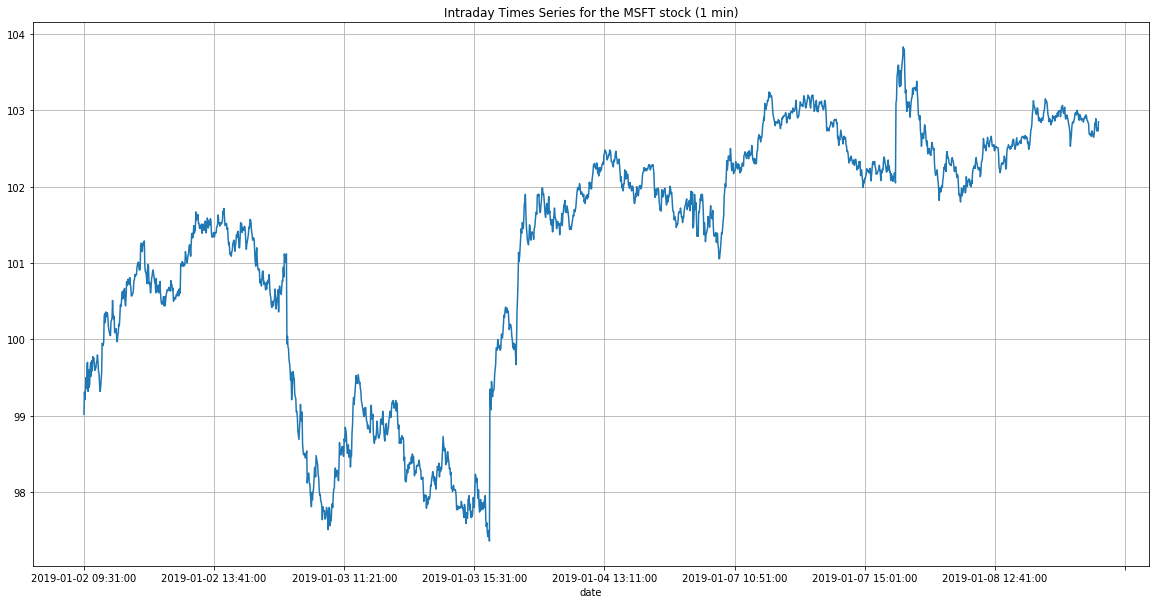

In [21]:
data.describe()
data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.grid()
plt.show()

In [24]:
# Getting CSV data:
ts = TimeSeries(key='MNVCLHF25M9MZ6QR', output_format='csv')
data_csv,_ = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='compact')
data_csv

C:\Users\rafae\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


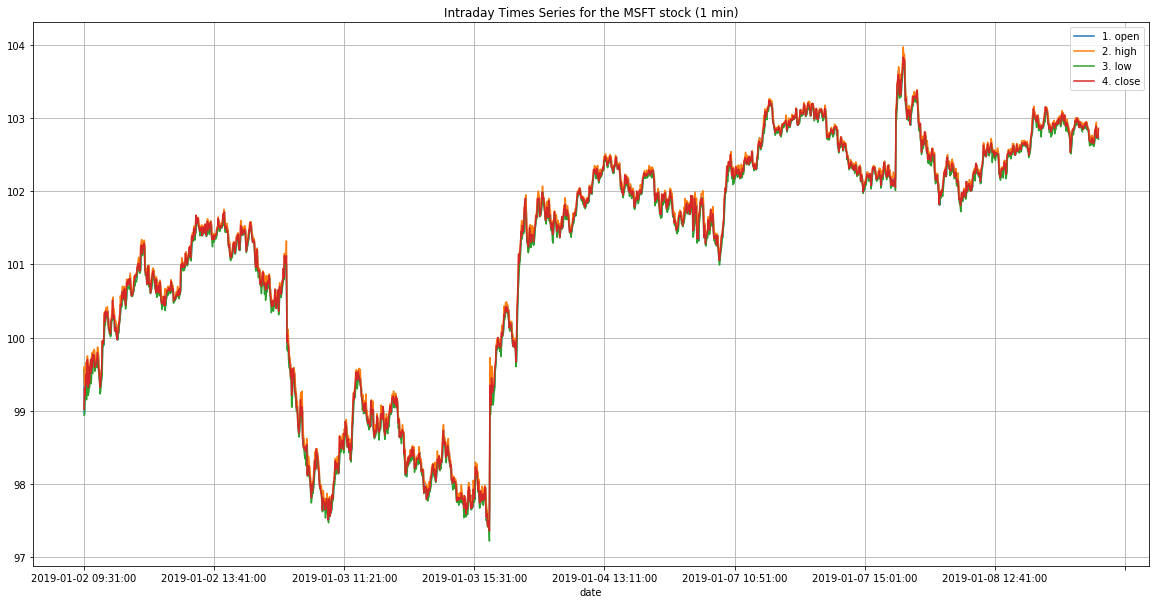

In [25]:
# Plotting the data:
data = data.drop('5. volume',1)
data.plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.grid()
plt.show()

In [27]:
# Working with batch quotes:

# It is still a TimeSeries call
ts.output_format='pandas'
data, meta_data = ts.get_batch_stock_quotes(symbols=('MSFT', 'FB', 'AAPL'))
data.describe()

,1. symbol,2. price,3. volume,4. timestamp
count,3,3,3,3
unique,3,3,1,2
top,AAPL,150.8000,--,2019-01-08 15:59:59
freq,1,1,3,2


In [28]:
data.head(3)

,1. symbol,2. price,3. volume,4. timestamp
date,,,,
0,MSFT,102.7500,--,2019-01-08 15:59:53
1,FB,142.5500,--,2019-01-08 15:59:59
2,AAPL,150.8000,--,2019-01-08 15:59:59


In [32]:
# Technical indicators:
from alpha_vantage.techindicators import TechIndicators

ti = TechIndicators(key='F900R15L0ATNPSH8', output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)
data.describe()

,Real Lower Band,Real Middle Band,Real Upper Band
count,353.000000,353.000000,353.000000
mean,101.356335,106.158513,110.960689
std,3.310193,2.770370,2.673213
min,94.177000,99.495600,103.470800
25%,100.343100,105.504300,109.828200
50%,102.132800,106.812200,111.813700
75%,104.007600,108.248300,112.529400
max,106.388100,109.049800,114.470500


C:\Users\rafae\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


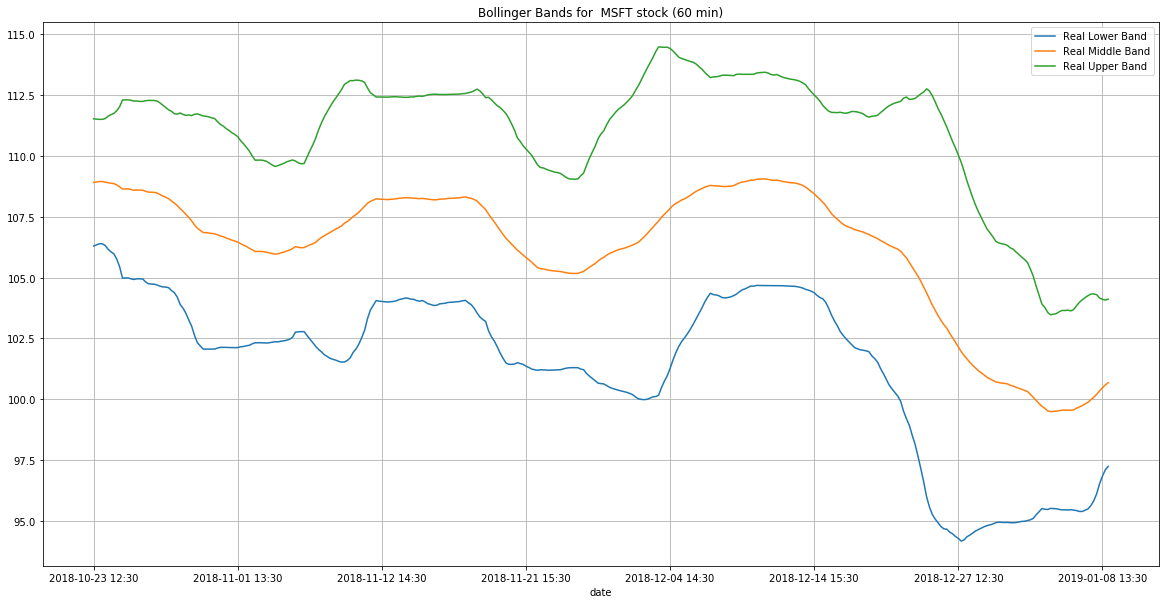

In [35]:
data.plot()
plt.title('Bollinger Bands for  MSFT stock (60 min)')
plt.grid()
plt.show()

In [34]:
meta_data

{'1: Symbol': 'MSFT',
 '2: Indicator': 'Bollinger Bands (BBANDS)',
 '3: Last Refreshed': '2019-01-08 15:30:00',
 '4: Interval': '60min',
 '5: Time Period': 60,
 '6.1: Deviation multiplier for upper band': 2,
 '6.2: Deviation multiplier for lower band': 2,
 '6.3: MA Type': 0,
 '7: Series Type': 'close',
 '8: Time Zone': 'US/Eastern Time'}

In [37]:
# Sector Performance:
from alpha_vantage.sectorperformance import SectorPerformances

sp = SectorPerformances(key='F900R15L0ATNPSH8', output_format='pandas')
data, meta_data = sp.get_sector()
data.describe()

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,10.000000,10.000000
mean,0.010764,0.010745,0.029418,-0.024691,-0.091727,0.029418,-0.076264,0.253090,0.305230,1.656010
std,0.004668,0.004671,0.023302,0.029063,0.064623,0.023302,0.081325,0.183583,0.338335,1.224716
min,0.000000,0.000000,0.003100,-0.065300,-0.207400,0.003100,-0.183100,0.009400,-0.300800,0.146900
25%,0.009250,0.009250,0.012950,-0.044700,-0.141350,0.012950,-0.145200,0.109475,0.154700,0.901025
50%,0.010200,0.010100,0.019100,-0.028800,-0.078600,0.019100,-0.097600,0.270350,0.308900,1.384800
75%,0.013350,0.013350,0.045650,-0.004600,-0.047650,0.045650,-0.000650,0.319850,0.525625,2.141100
max,0.017800,0.017800,0.067900,0.026500,-0.003000,0.067900,0.033500,0.624100,0.892400,3.745400


In [39]:
meta_data

{'Information': 'US Sector Performance (realtime & historical)',
 'Last Refreshed': '04:20 PM ET 01/08/2019'}

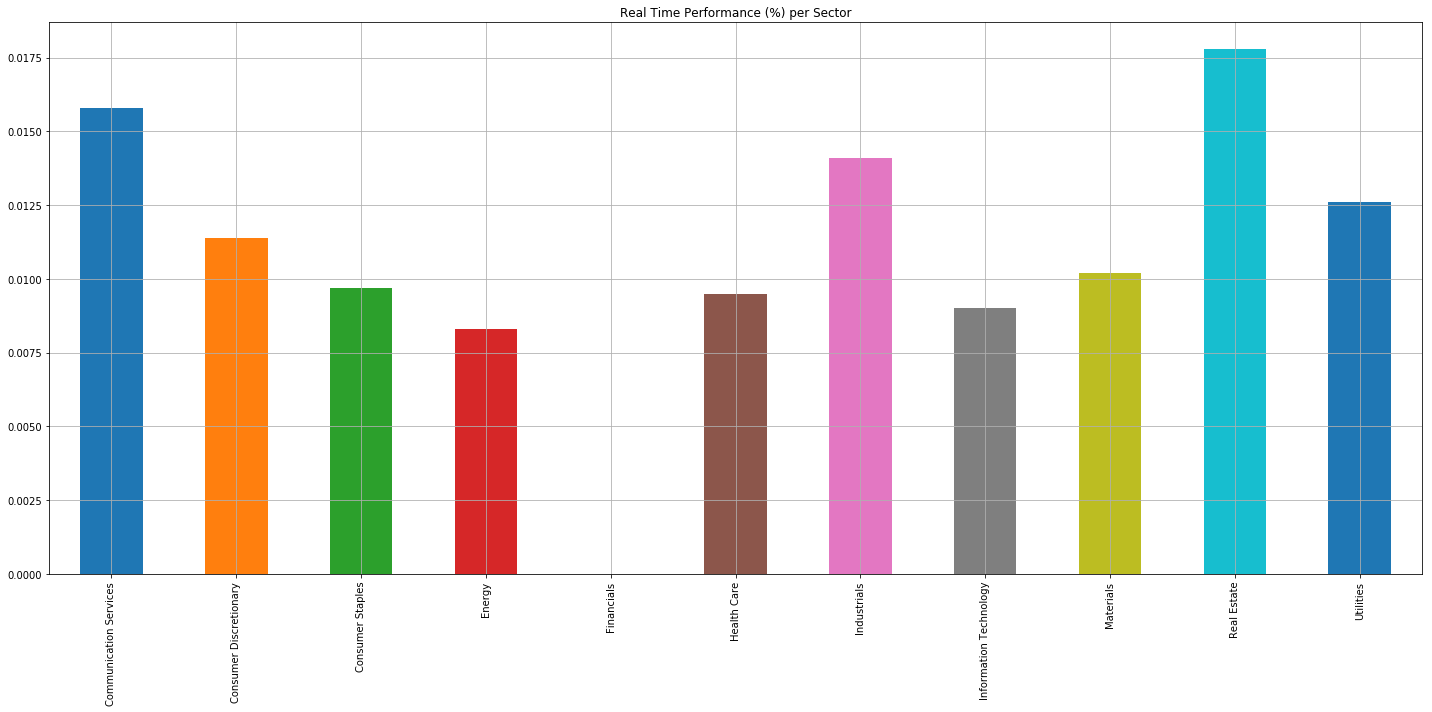

In [38]:
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()